<a href="https://colab.research.google.com/github/Funmilayo-Aina/DEEP-LEARNING-PROJECTS/blob/main/Neural_Network_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
# Lets check the current recommended Version 
tf.__version__

'2.6.0'

In [ ]:
data = pd.read_excel("/content/02 Churn-Dataset (1).xlsx")

In [ ]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0,0,No


In [ ]:
data.drop(['customerID','Partner'], axis=1,inplace = True)

In [ ]:
#Check for missing values
data.isnull().sum()

gender              0
SeniorCitizen       0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [ ]:
#check for objects datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [ ]:
# Converting object dtypes to intdtypes to build a predictive model


In [ ]:
data_types_dict = dict(data.dtypes)
# keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name, data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] =Le
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   int64  
 16  MonthlyCharges    7043 non-null   float64


In [ ]:
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight = 'balanced', classes= np.unique(Ytrain),y=Ytrain)

model_class_weights= {}
for e , weight in enumerate(class_weights):
     model_class_weights[e] = weight


In [ ]:
  model_class_weights

{0: 0.6847350510452115, 1: 1.8532894736842105}

In [ ]:
Xtrain, Xtest,Ytrain, Ytest = train_test_split(X,Y, test_size =0.2, random_state =4)

In [ ]:
## Building our Neural Networks.

# Start your model with Sequential Object  
model = tf.keras.models.Sequential()
# Next add in your Input object and Specify the Dimension you want to pass in 
model.add(tf.keras.Input(shape=(20,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128 ,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
# Add in your Neurons of 1st layer
model.add(tf.keras.layers.Dense(64 ,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32 ,activation='relu'))
## final sigmoid layer to predict(0/1)
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to undertstand your neural network flow
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
dense_15 (Dense)             (None, 128)               2688      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)               

In [ ]:
Create optimizer

In [ ]:
Optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001)
model.compile(Optimizer, loss = 'binary_crossentropy',metrics=["accuracy"])

In [ ]:
 history = model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest) , epochs=20)

Epoch 1/20
177/177 [==============================] - 2s 4ms/step - loss: 0.4761 - accuracy: 0.7680 - val_loss: 0.3548 - val_accuracy: 0.8325
Epoch 2/20
177/177 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8273 - val_loss: 0.3351 - val_accuracy: 0.8396
Epoch 3/20
177/177 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.8348 - val_loss: 0.3311 - val_accuracy: 0.8410
Epoch 4/20
177/177 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8449 - val_loss: 0.3223 - val_accuracy: 0.8510
Epoch 5/20
177/177 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8497 - val_loss: 0.3167 - val_accuracy: 0.8510
Epoch 6/20
177/177 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8415 - val_loss: 0.3235 - val_accuracy: 0.8460
Epoch 7/20
177/177 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8500 - val_loss: 0.3191 - val_accuracy: 0.8524
Epoch 

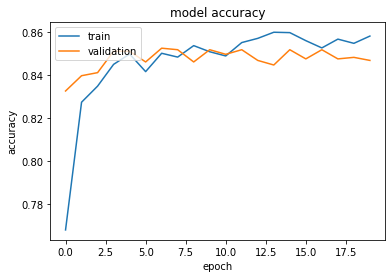

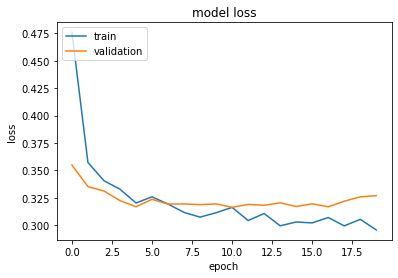

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc= 'upper left')
plt.show()
#  Loss plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
# Collect predictions
predictions = np.round(model.predict(Xtest))

In [ ]:
#Check accuracy
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(Ytest,predictions) # Accuracy seems good

0.8466997870830376

In [ ]:
confusion_matrix(Ytest, predictions)

array([[941, 119],
       [ 97, 252]])